# 💀 Titanic (Grupo 2) 🚢

## Importando Bibliotecas 📚

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.size'] = 14
plt.style.use('seaborn-whitegrid')
from sklearn.impute import SimpleImputer
import seaborn as sns
import statistics
import numpy as np
import sklearn # 0

## Engenharia 🛠

In [7]:
df = pd.read_csv("train.csv") # Lendo arquivo .cvs

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Procurando valores nulos no data set

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.describe() # Estatística descritiva dos dados, que será usada para escolher alguns dados. Bem como para compreensão destes

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df[~df['Embarked'].isin(['S', 'C', 'Q'])]  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Filtrando dados que não contenham na coluna Embarked os argumentos S, C ou Q. Para podermos completar ou excluir essas colunas.

In [12]:
df.groupby('Embarked')['Pclass'].mean()

Embarked
C    1.886905
Q    2.909091
S    2.350932
Name: Pclass, dtype: float64

Agrupamento de dados Embarked por classe. É notório que C tem a menor média, se comparado a Q e S, por enquanto essa informação não tem contexto. 

In [13]:
# number of people who survived in each embarked port

df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Contextualizando em termos de sobreviventes, vemos que 55,3% dos sobreviventes embarcaram no porto C. 

In [14]:
df.Embarked.fillna('C', inplace=True) # Adiciona C as células vazias do data set

Logo, por conveniência podemos estimar que C seja o porto de origem de algum tripulante que tenha esse dados. 

In [15]:
# Declarando null ages

idades_nulas = df[df.Age.isnull()]

In [16]:
idades_nulas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [19]:
amostra = []
for i in range (500):
    parte = df.Age.sample(500)
    amostra.append(parte.mean()) 
statistics.mean(amostra)


29.35780464

Amostra simples sucessiva, que usada para extrair a média e após isto encontrar uma média que traga mais confiabilidade ao resultado. 

In [17]:
# Usando sklearning para completar dados faltantes do data set com base na mediana

imp = SimpleImputer(missing_values=np.nan, strategy='median')

df['Age'] = imp.fit_transform(df[['Age']])

Adicionando os valores nas ceélulas faltantes da coluna idade. Neste caso, a mediana é muito proxima ao resultado obtido através da amostra. 

<AxesSubplot:ylabel='Frequency'>

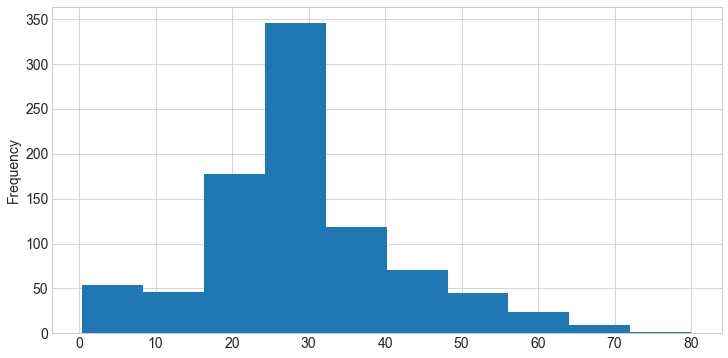

In [20]:
df['Age'].plot(kind='hist')

Observação dos dados após a adição dos valores nas células vazias. Vemos que a distribuição dos dados entorno da média foi reforçado uma vez que substituimos as idades faltantes ´pelo valor da mediana. 

In [21]:
# drop cabin

df.drop('Cabin', axis=1, inplace=True)

Eliminação da coluna Cabin, por não ter significância em termos de análise nem volume que correponda a uma confiabilidade mínima. Obs: Há 687 dados faltantes. 

In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Check final do tratamento dos valores faltantes. 

## Análise 🔎 

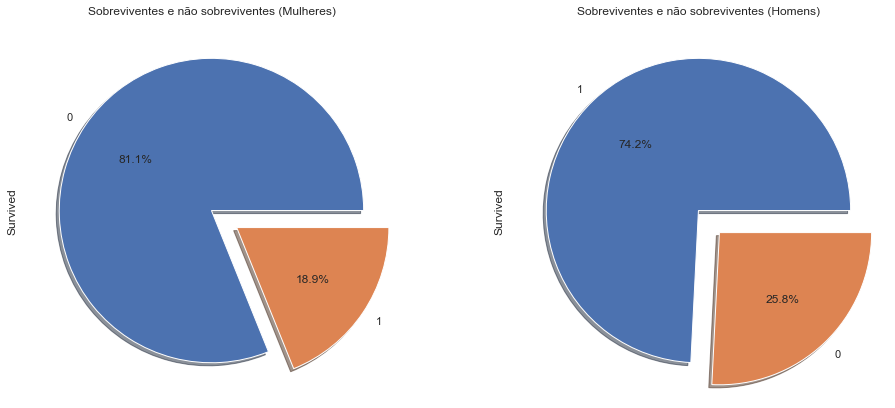

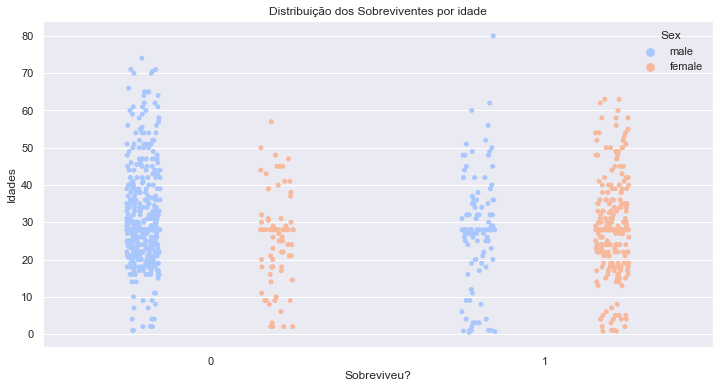

In [77]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Sobreviventes e não sobreviventes (Mulheres)')
ax[1].set_title('Sobreviventes e não sobreviventes (Homens)')
plt.show()

sns.set_style('darkgrid') 
sns.stripplot(x ='Survived', y ='Age', data = df, jitter = True, hue ='Sex', dodge = True, palette='coolwarm')
plt.title("Distribuição dos Sobreviventes por idade")
plt.ylabel("Idades")
plt.xlabel("Sobreviveu?")
sns.set(style='whitegrid')

Iniciando com a análise com foco nos sobreviventes divididos pelos seus sexos. No gráfico de pizza, vemos uma alta proporção de sobreviventes mulheres em detrimento da proporção dos homens, tal discrepancia chega a casa dos 55,3%. Tais fatos, possívelmente são devidos a cultura e tempo na qual os tripulantes estavam inseridos. Outra interpretação pode ser levada em conta quando vemos o gráfico de distribuição, que demonstra uma alta concentracao de homens em detrimento de mulheres. Isso adiciona mais um insigth em nossa análise, que também deve levar em conta um padrão de idade dos homens em relação com as das mulheres. Por fim, podemos concluir que há uma maior volume de homens o que pode criar um peso a mais no número de mortos, mas ao que ambos gráficos sugerem na distribuição e proporção, há poucas chances que tais fatores interfiram significativamente, ou seja, há um maior número de mortos na população masculina do návioem termos porporcioinais e quantitativos. A questão é, o que pode ter causado essa alta no número de óbitos na população masculina, além das suposições culturais? 

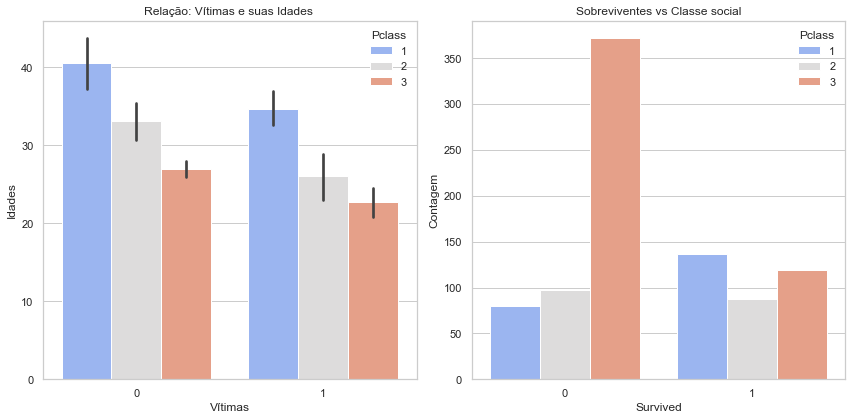

In [76]:
plt.figure()

plt.subplot(1,2,1)
sns.barplot(x = 'Survived', y = 'Age', hue='Pclass', data=df, palette='coolwarm')
plt.title("Relação: Vítimas e suas Idades ")
plt.ylabel("Idades")
plt.xlabel("Vítimas")
sns.set(style='whitegrid')

plt.subplot(1,2,2)
sns.countplot(x = 'Survived', hue='Pclass', data=df, palette='coolwarm')
plt.title("Sobreviventes vs Classe social")
plt.ylabel("Contagem")
sns.set(style='whitegrid')


plt.tight_layout()
plt.show()

Analisando os gráficos, podemos especular com um bom grau de confiabilidade que a classe social tem um peso no resultado do acidente para cada tripulante. Logo de início, é visível que os sobreviventes da classe 3 que sobreviveram eram mais novos isso pode sugerir alguma informação indireta sobre o a pré disposição física desses tripulantes mais novos, em detrimento dos sobreviventes da classe 1 que eram mais velhos, o que indiretamente poderia estar atrelado a sua localização em relação aos pontos de saída de emergência do návio. Com isso, podemos concluir que o fator da classe pode ter pesado no resultado do acidente, e criado uma tendência para alguns grupos como para as pessoas que estavam na 3° classe, que podem ter tido dois fatores preponderantes: maior aptidão física sugerida pela idade e localização estratégica. 

O local de embarque pode explicar ou endossar mais informações seguindo a tendência analisada até agora? 

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 29.120000000000005, 'Vítimas')

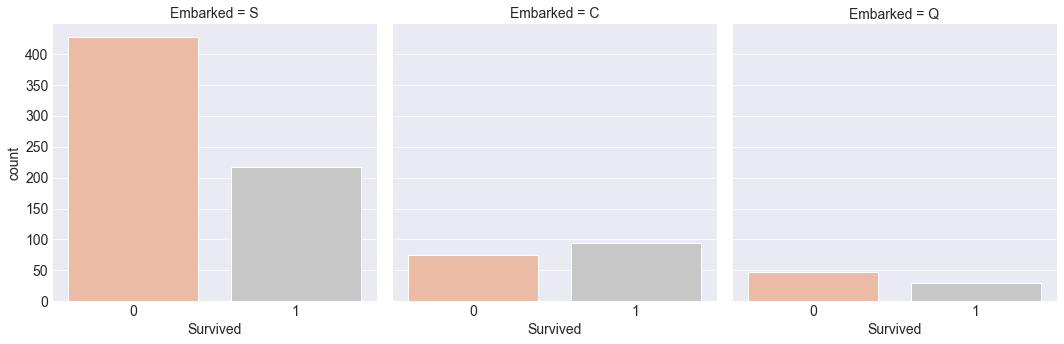

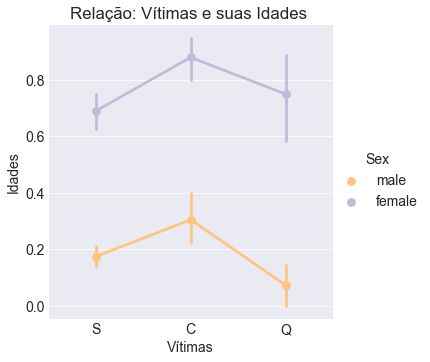

In [71]:

sns.catplot(x='Survived', col='Embarked', kind='count', data=df, palette='RdGy')


sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=df, align = 'center', palette='PuOr')
plt.title("Relação: Vítimas e suas Idades ")
plt.ylabel("Idades")
plt.xlabel("Vítimas")

Sim, vemos no primeiro grafico um alto volume de embarque no porto S e também um grande número de sobreviventes que se seguindo a tendência são de maioria classe 3, mulheres e novos, assim como sugere o segundo gráfico. Todavia, como a classe nem a poltrona eram escolhidos de forma aleatória não é possível inferir ou relacionar o porto de embarque com o resultado do acidente, ou seja, se o tripulante pagou a 3° classe e é jovem e mulher terá prioridade na entrada da balleira, isso é o que os dados nos sugere. 

E quem tinham familiares, houveram mais vítimas nesse grupo?

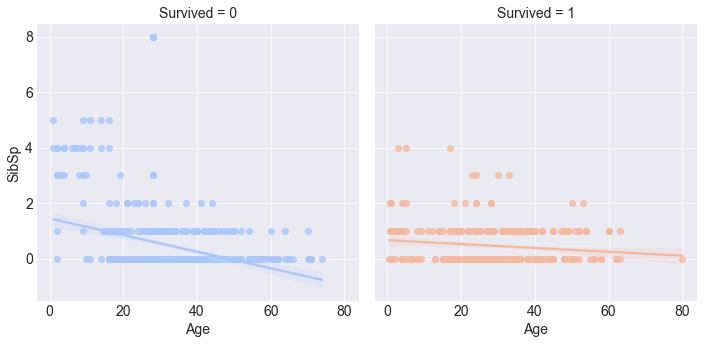

In [73]:
sns.lmplot(x='Age', y='SibSp', data=df, hue='Survived' , col='Survived', palette='coolwarm')


De acordo com o gráfico de dispersão e com uma linha de tendência onde ocorre os máximos locais, vemos que há um numero expresivo de sobreviventes com irmão e a linha de tendência tendendo com baixa velorcidade para o negativo. Do mesmo modo, são mais novos e sem muitos familiares. Os não sobreviventes tem um volume maior de familiares, ou seja, possivelmente esse ponto afetou no resultado final.

In [ ]:
df.groupby("Survived").Sex.value_counts(normalize=True)
# dataframe.groupby("Survived").max()

Survived  Sex   
0         male      0.852459
          female    0.147541
1         female    0.681287
          male      0.318713
Name: Sex, dtype: float64

In [ ]:
df.groupby("Survived")['Age'].mean()
# dataframe.groupby("Survived").max()

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

Text(0, 0.5, 'Idade')

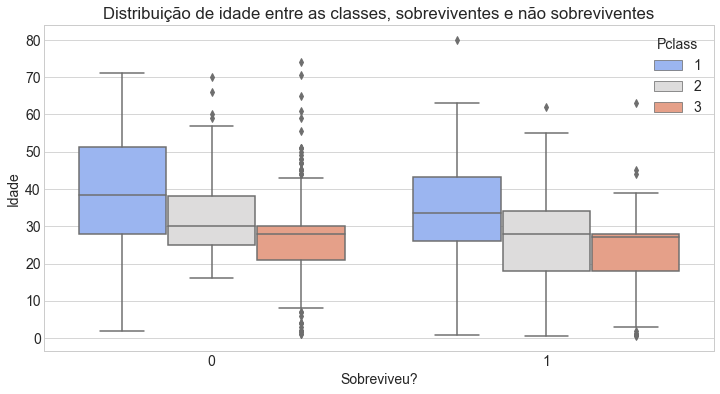

In [51]:
# boxplot survived vs age

sns.boxplot(x = 'Survived', y = 'Age', hue="Pclass", data = df, palette='coolwarm')
plt.title("Distribuição de idade entre as classes, sobreviventes e não sobreviventes")
plt.xlabel("Sobreviveu?")
plt.ylabel("Idade")
# sns.swarmplot(x="Survived", y="Age",hue='Pclass', data=dataframe)

Analisando o box plot vemos que a classe 1 não sobrevivente tem uma media de idade maior que as outras classes e os dados mais distribuidos no intervalo interquartil. Assim como visto anteriormente, a classe 3 teve uma media menor e o intervalo interquartil é menos distribuido estando mais de 50% de dos dados incluidos no intervaldo de 20 a 30 anos. Por outro lado, os sobreviventes mais novos ficaram na 3° classe. O que reforça o ja visto anteriormente na amostra. 

Text(0, 0.5, 'Tarifa')

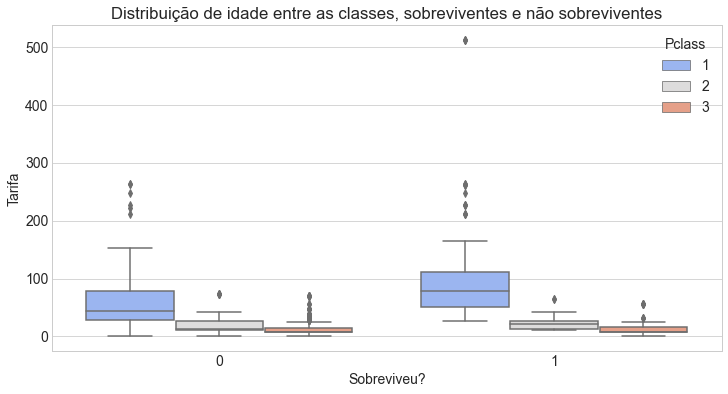

In [52]:
# boxplot survived vs fare

sns.boxplot(x = 'Survived', y = 'Fare', hue="Pclass", data = df, palette='coolwarm')
plt.title("Distribuição de idade entre as classes, sobreviventes e não sobreviventes")
plt.xlabel("Sobreviveu?")
plt.ylabel("Tarifa")

De acordo com esse gráfico podemos notar o comportamento da variação da tarifa distribuida pelos tripulantes. Vemos que as maiores tarifas foram pagas pelos tripulantes da 1° class com muitos outliers. Tal informação tem carater trivial, mas será que essa tarifa paga afetou o resultado do acidente do titanic levando em conta que a classe 3 teve um maior volume de sobreviventes. 

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Tarifa')

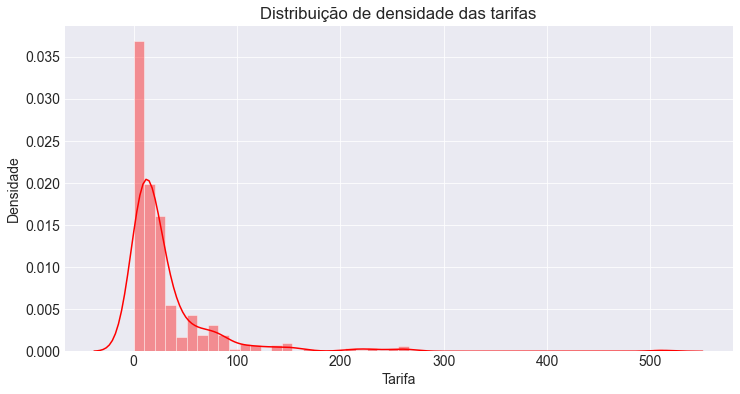

In [74]:
sns.distplot(df['Fare'], color = "red")
sns.set_style('darkgrid')
plt.title("Distribuição de densidade das tarifas")
plt.ylabel("Densidade")
plt.xlabel("Tarifa")

De acordo com o gráfico, vemos que as tarifas pagas pelos tripulantes são assimetricas, mas com um alto volume concentrado na assimetria a direita. O que sugere que tais dados não devem ter significância sobre o resultado do acidente, uma vez que os tripulantes que pagaram menos que sobreviveram mais. 

<AxesSubplot:>

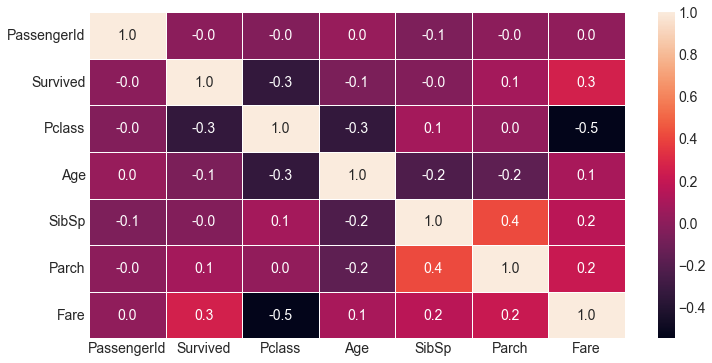

In [ ]:
import seaborn as sn
correlation = df.corr()
sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)


In [ ]:
# Adol = df[df['Age'] <= 15]['Age']
# Jove = df[df['Age'] >= 16 & < 25]['Age']
# Adul = df[df.Age >= 26 and < 60]['Age']
# Adol
# adolecente = df.query('Age < 15')
# jovem = df.query('Age >= 16 & < 25')
# adulto = df.query('Age >= 26 & < 50')
# idoso = df.query('Age >= 50 & < 82')
# df['Faixa Etaria'] = pd.cut(df['Age'], bins=[0, 15, 25, 60, 100]) 


# Modelagem  🚀 